In [1]:
import os
import caiman as cm
import suite2p
import numpy as np
np.seterr(all="ignore")
import pandas as pd
pd.set_option('mode.chained_assignment', None)


import sys
sys.path.append(r'C:\Users\matt_analysis\PycharmProjects')
from ImageAnalysisCodes import core, utils, visualize

import matplotlib.pyplot as plt

C:\Soft_Kitty\Anaconda3\envs\caiman2\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Soft_Kitty\Anaconda3\envs\caiman2\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  me

In [2]:
data_path = r'D:\Data\Imaging\2021\fourday_two_100'

In [ ]:
core.neuron_extraction(data_path)

In [ ]:
utils.pandas_stim_aligner(data_path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


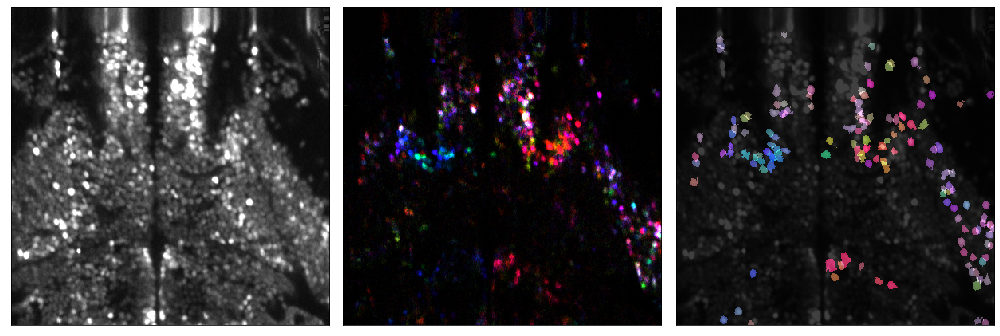

In [3]:
brightnessUp = 5
tuning_threshold = 2.5

stim_df, cells = utils.stim_cell_returner(data_path)

try:
    diff, alldiffs = visualize.pixelwise(data_path)
except AttributeError:
    diff, alldiffs = visualize.pixelwise2(data_path)

cellimg, ops, celldf = visualize.neuronColor(data_path, threshold=tuning_threshold, plot=False)
masked = np.ma.masked_where(cellimg == 0, cellimg)

fig, ax = plt.subplots(1,3, figsize=(14,8))

ax[0].imshow(np.rot90(ops['refImg'], -1), cmap='gray', vmax=150)
ax[1].imshow(np.rot90(diff*brightnessUp, -1))
ax[2].imshow(np.rot90(ops['refImg'], -1), cmap='gray', vmax=150)
ax[2].imshow(np.rot90(masked, -1), interpolation=None, alpha=0.75)

for a in ax:
    a.get_xaxis().set_visible(False)
    a.get_yaxis().set_visible(False)
    
plt.tight_layout()
plt.show()

In [5]:
celldf

,neuron,stimulus,val,error
0,0,Backward,0.518213,0.202608
1,0,Forward,0.402808,0.100780
2,0,BackwardLeft,0.382972,0.078655
3,0,ForwardRight,0.449520,0.085806
4,0,ForwardLeft,0.519880,0.123093
...,...,...,...,...
8539,1067,ForwardRight,0.897399,0.324407
8540,1067,ForwardLeft,0.601485,0.182616
8541,1067,Left,0.240026,0.055593
8542,1067,BackwardRight,1.307226,0.336047


In [6]:
top_fwds = celldf[celldf.stimulus=='Forward'].sort_values(by='val', ascending=False)[:5]

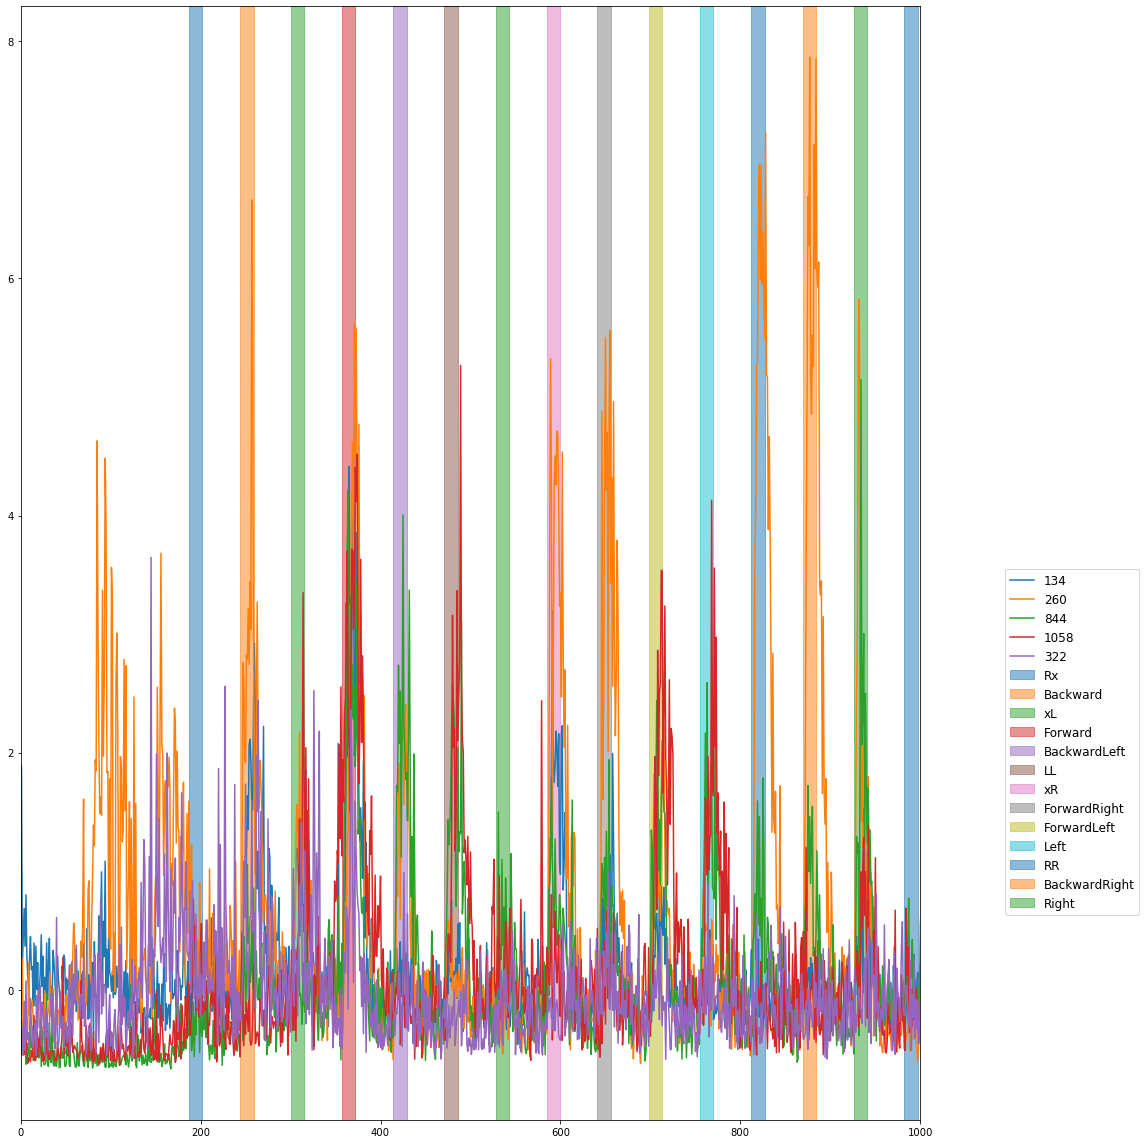

In [7]:
plt.figure(figsize=(16,16))
for i in top_fwds.neuron.values:
    plt.plot(cells[i], label=i)
    
clrstims = utils.colormapStimuli(stim_df)
for stim in range(len(clrstims)):
    x = clrstims.iloc[stim]
    
    plt.axvspan(x.start, x.stop, color=x.color, alpha=0.5, label=x.stimulus)
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize=12, bbox_to_anchor=(1.25, 0.5))

plt.xlim(0,1000)
plt.tight_layout()

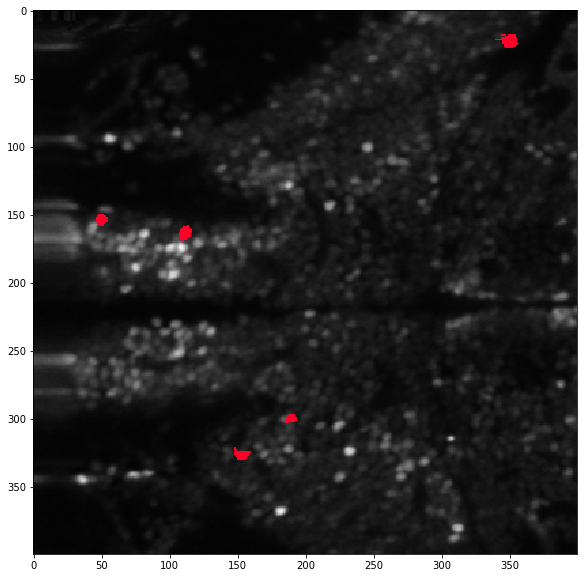

In [8]:
visualize.plot_cell(data_path, top_fwds.neuron.values)